# 수송수단 연료별 에너지 소비량 원단위 및 온실가스 배출량 원단위 분석 및 정책 제언
## - 항공, 선박, 철도를 중심으로 -

## 목차

    1. 서론
        1.1 연구의 개요
        1.2 연구 수행 과정
        1.3 기초 자료

    2. 관련 선행 연구 고찰 및 분석 방법론
        2.1 관련 선행 연구 고찰
        2.2 분석 방법론
            2.2.1 에너지 소비량 산정 방법
            2.2.2 온실가스 배출량 산정 방법 및 연료별 온실가스 배출량 환산계수
            2.2.3 에너지 소비 및 온실가스 배출 원단위 산정 방법

    3. 에너지 소비량 및 온실가스 배출량 원단위 산정 및 분석
        3.1 철도수송 부문 에너지 소비량 및 온실가스 배출량
        3.2 선박수송 부문 에너지 소비량 및 온실가스 배출량
        3.3 항공수송 부문 에너지 소비량 및 온실가스 배출량
        3.4 수송부문별 에너지 소비량 및 온실가스 배출량 원단위
        
    4. 결론 및 정책 제언
        4.1 결론
        4.2 정책 제언
        
    5. 참고 문헌


# 1. 서론

## 1.1 연구의 개요

지구온난화로 인해 기온과 해수 온도의 상승, 빙하의 융해, 해수면이 상승하는 등 많은 문제가 발생하고 있다. IPCC(Intergovernmental Panel on Climate Change) 지구온난화 1.5℃ 특별보고서에 따르면 지구온난화의 주원인인 이산화탄소(CO2)는 산업화 이후 40%가 증가하였으며, 농도는 2011년에 391ppm으로 증가하였고, CO2 양은 대기측정이 시작된 1958년 이후 20% 이상 증가하였다.

이에 따라 지구평균기온은 지난 133년간 0.85℃ 상승하였고, 평균 강수량의 변화는 뚜렷하지는 않으나, 1901년 이후 북반구 중위도 육지에서 강수량이 증가하였으며, 평균해수면은 110년간(1901~2010년) 19cm 상승하였다고 한다. 이런 면에서 장기적으로 지구온난화의 주요 촉진요인은 CO2 배출량이며, 온난화와 CO2 배출량은 상호비례관계에 있으므로 지구온난화 방지를 위한 CO2 배출량 규제는 국제사회의 당면 과제라 할 수 있다.

항공의 이산화탄소 배출은 전체의 약 2% 정도로 큰 수치는 아니지만, 고고도(高高度)에서 배출되어 대기에 직접적인 영향을 미친다. 그렇기에 우리는 항공 부문의 탄소 배출에 관심을 쏟아야 한다. 따라서 공항 및 인접지역의 교통량과 항공기 운용에 따른 온실기체(CO2, CH4, N2O)의 배출량을 계산하여 항공 관련 온실가스 배출에 의한 기후변화의 정량적 산출 및 대응책을 마련하고자 한다.

이에 따라 본 연구에서는 철도와 해운, 항공 부문에서 각각 에너지 소비량과 온실가스 배출량을 산정하고 환경적 영향분석의 기초가 되는 원단위를 산정하여 비교해 보았다.

에너지 소비량을 산정하기 위한 활동도 자료로서 철도는 철도통계연보를 활용하였고 선박과 항공은 교통안전공단에서 발행하는 교통물류 온실가스 배출량 조사보고서를 활용하였다. 산정된 에너지 소비량을 기반으로 한국에너지공단 온실가스 배출량 환산계수 데이터를 통해 온실가스 배출량을 산정하였다. 최종적으로 수송실적 자료를 이용하여 에너지소비 및 온실가스 배출 원단위를 산정하고 그 결과를 비교하여 보았다.

## 1.2 연구 수행 과정

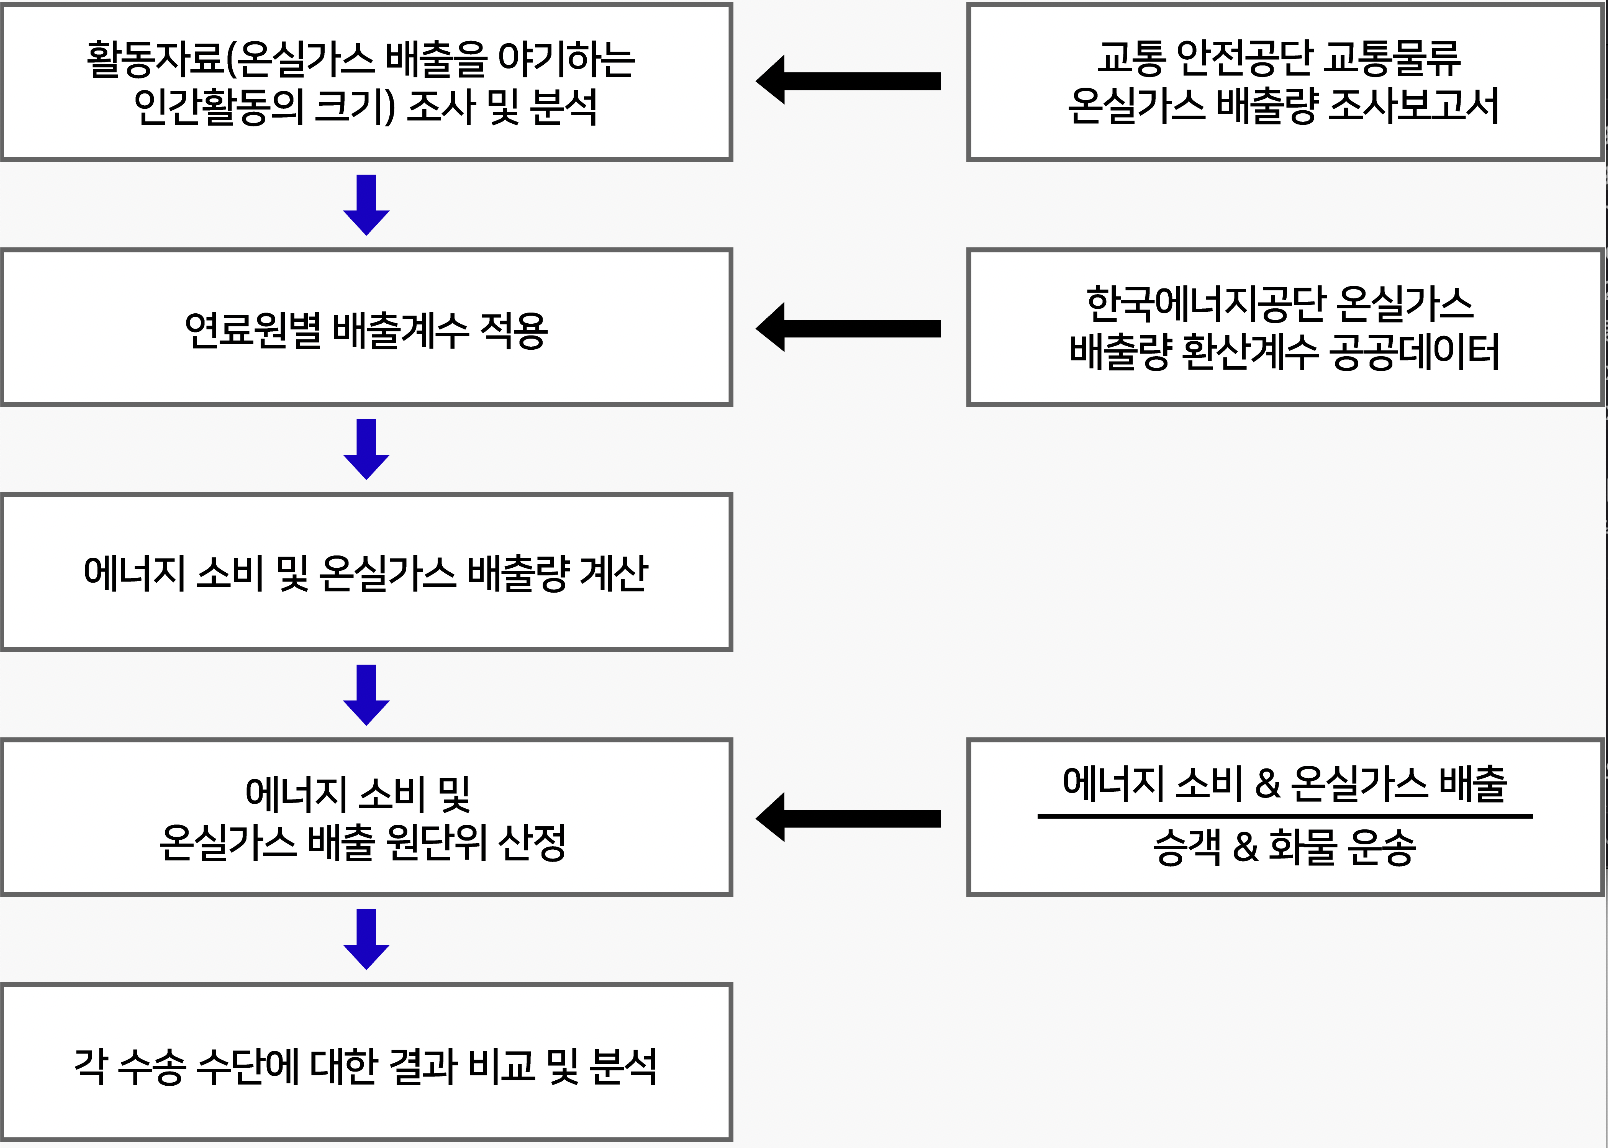

In [129]:
Image('/Users/kimtaeyong/Desktop/final/images/process.png')

## 1.3 기초 자료

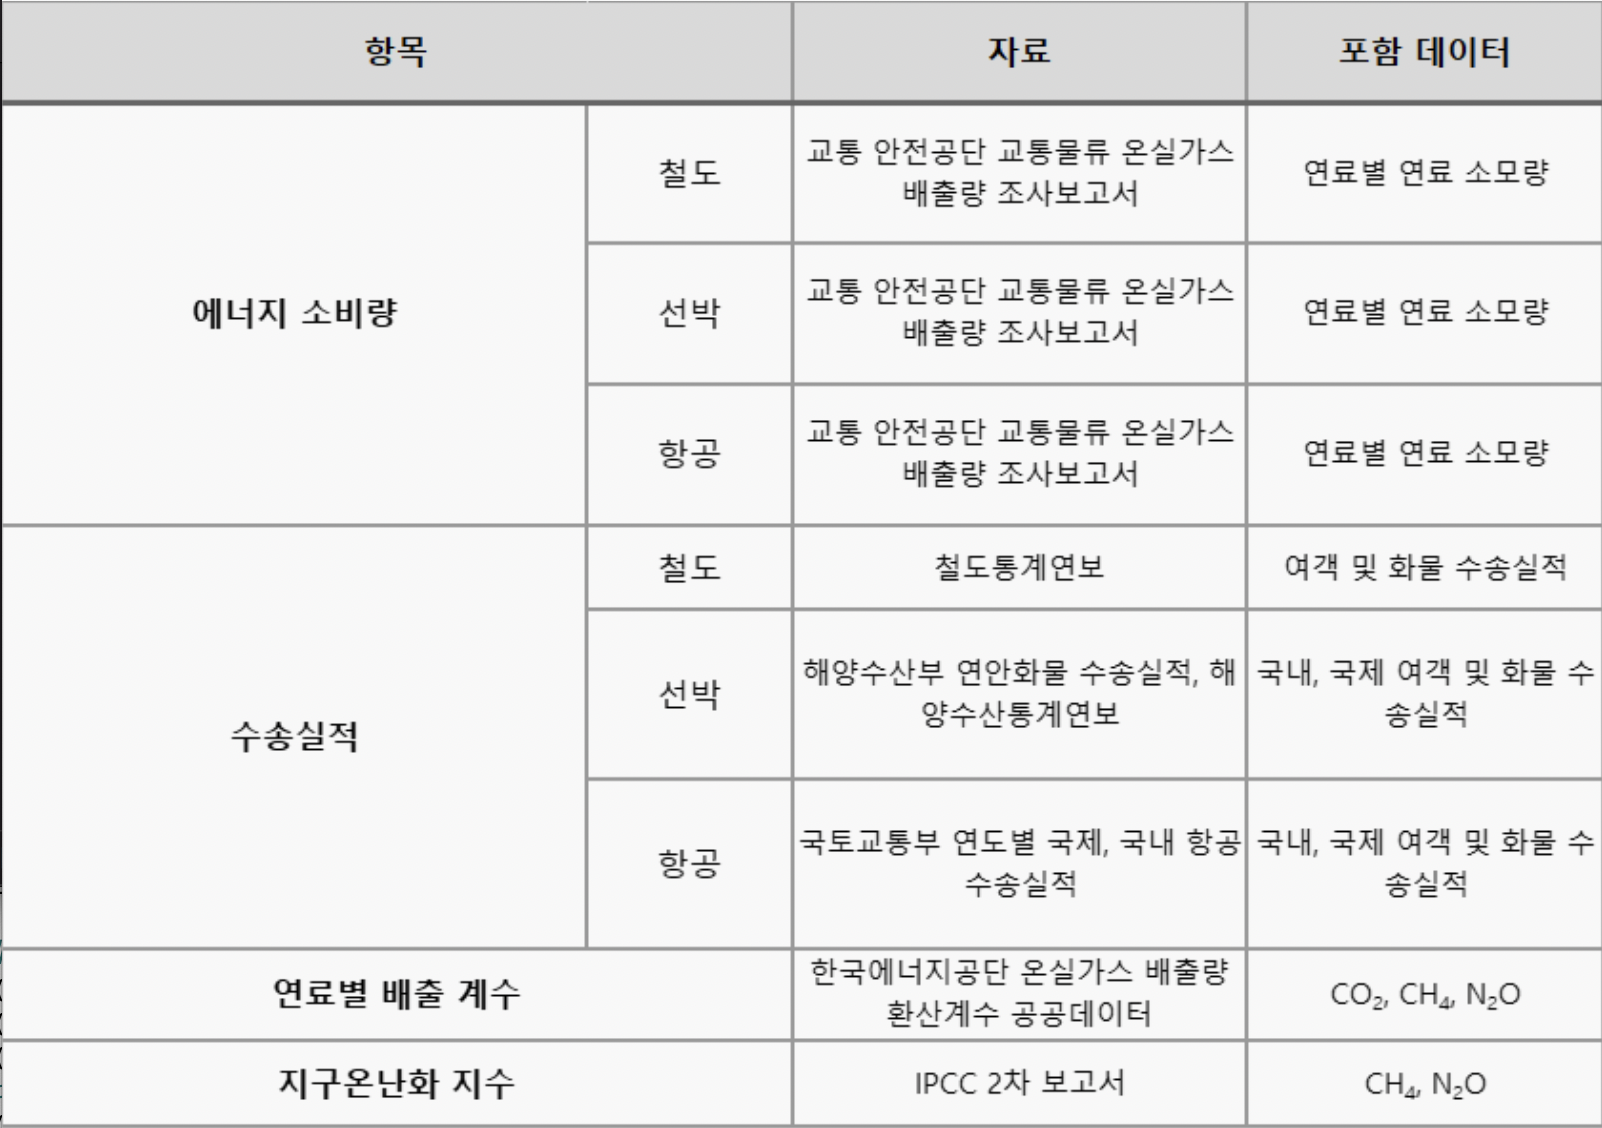

In [130]:
Image('/Users/kimtaeyong/Desktop/final/images/dataInfo.png')

In [101]:
# Import Library
import pandas as pd
from os import write
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
from xml.etree import ElementTree
from IPython.display import Image
import matplotlib.pyplot as plt

# 2. 관련 선행 연구 고찰 및 분석 방법론

## 2.1 관련 선행 연구 고찰

각 수송수단별 에너지 소비량 및 온실가스 배출량, 그리고 그 원단위를 산정하기 위해서는 기존의 통계자료 및 데이터가 필요하고 이와 관련된 국가 온실가스 통계체제를 살펴볼 필요가 있다.

현재 유엔기후변화협약 UNFCCC (United Nations Framework Convention on Climate Change)에 제출하고 있는 국가 온실가스 인벤토리 보고서 작성지침에서는 IPCC의 지침에 따라 국가 온실가스 배출 및 흡수량을 산정하게 하고 있으며 이에 따라 현재 대한민국의 온실가스 인벤토리 역시 2006 IPCC 지침을 따르고 있다. 또한, 지구온난화 지수(GWP)는 현재 대한민국 온실가스 인벤토리에 적용된 지수를 반영하기 위해 IPCC 2차 평가보고서를 적용하고 있다.

수송부문 온실가스 배출량 산정등급(Tier)은 활동자료, 배출계수, 산화율, 전환율 및 온실가스 배출량 등 산정방법의 복잡성에 따라 Tier 1 ~ Tier 3 방식으로 나뉘며 산정등급이 높을수록 신뢰도와 정확도가 향상된다. 현재 대한민국은 온실가스 의무감축국이 아니며 따라서 국제적으로 통용되는 IPCC 가이드라인에서 제시하는 배출계수인 Tier 1 수준에서 비교 및 분석을 수행할 것이다.

수송부문은 도로, 철도, 항공, 선박부문으로 구분되며 IPCC는 부문별로 온실가스 배출량을 산정하도록 가이드라인을 제시하고 있다. 이중 철도 부문의 경우 에너지총조사보고서에서는 총량적인 에너지소비량만을 보여준다. 고속철도, 일반철도, 여객, 화물 등 세부적인 분석을 위해서 철도통계연보를 참고하였다. 철도, 항공, 선박의 에너지소비량은 교통 온실가스 관리 시스템의 자료를 활용하여 산출하였다.

## 2.2 분석 방법론

### 2.2.1 에너지 소비량 산정 방법

각 운송업(철도, 항공, 선박)의 에너지 소비량을 추출하기 위해 본 프로젝트에서는 교통 안전공단 교통물류 온실가스 배출량 조사보고서에 명시되어 있는 에너지 소비량 데이터를 사용하였다.

사용한 에너지 소비량 데이터에는 철도, 항공, 선박에 대해 1990년부터 2018년까지 연료(가솔린, 디젤, LPG, AVGAS, 중유, 등)에 따른 에너지 소비량이 제시되어 있었다. 그러나 프로젝트를 이행하는데 있어 1999년부터 2018년까지의 데이터만 필요하기에 데이터의 일정부분을 추출하여 사용하였다.

에너지 소비량을 구하는 공식은 연료별 소모량을 연료별 순발열량 변환계수와 곱한 값이다.

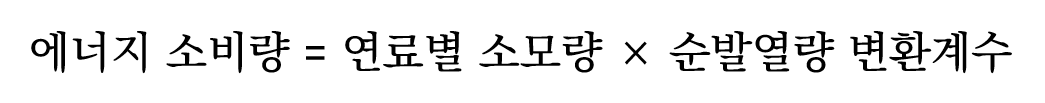

In [131]:
Image('/Users/kimtaeyong/Desktop/final/images/energyFomula.png')

### 2.2.2 온실가스 배출량 산정 방법 및 연료별 온실가스 배출량 환산계수

연료원별 온실가스 배출량은 연료원별 순발열량에 따른 에너지 소비량을 계산 후, 이를 한국에너지공단에서 제공한 온실가스 배출량 환산계수 공공데이터를 기반으로 추출한 연료원별 배출계수와 곱하여 산정한다.

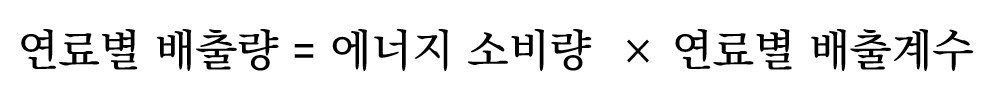

In [134]:
Image('/Users/kimtaeyong/Desktop/final/images/emisFomula.png')

다음은 한국에너지공단에서 제공한 에너지 사용 및 온실가스 배출량 정보 개방 코드정의서의 연료별 고유 코드이다. 이 사용한 연료들의 고유코드들은 본 연구에서 사용하였다.

휘발유: B1 / 경유(디젤): B3 / B-C유(중질중유): B6 / 항공유: B9 / 기타석유: B15 / LPG(도시가스):C5

In [144]:
# 한국에너지공단 온실가스 배출량 환산계수 공공데이터

# Service Key 및 URL 선언
skey = '%2Fif8oxUx%2FaeG7lTK4xLFs6apmOu3R%2FzMoVQM8pU8lgziqq9yUZHTD0NrDSq65KwPpZQDBnZPGiEywL3ppCxqfA%3D%3D'
url = 'http://apis.data.go.kr/B553530/GHG_CONVERSION_01/GHG_CONVERSION_01_LIST'

# DataFrame 생성
df_coefficients = pd.DataFrame()
coefficients = ['B1', 'B3', 'C5', 'B6', 'B15', 'B9']

# 연료별 온실가스 배출량 환산계수 산출
for i in coefficients:
    params = '?' + 'ServiceKey=' + skey + '&' + \
    urlencode({ quote_plus('pageNo') : '1',  
                quote_plus('numOfRows') : '100',
                quote_plus('apiType') : 'xml' ,
                quote_plus('q1') : '2018',
                quote_plus('q2') : '%s' % i})

    request = Request(url + params)
    request.get_method = lambda: 'GET'
    response_body = urlopen(request).read()

    root = ElementTree.fromstring(response_body)

    for item in root.iter('item'):
        item_dict = {}
        item_dict['Year'] = item.find('TRGT_YEAR').text # 대상연도
        item_dict['Energy_Code'] = item.find('ENGSRC_CD').text # 에너지원_코드
        item_dict['Unit_Code'] = item.find('CRTR_UNIT_CD').text # 기준_단위_코드
        item_dict['Net_Calorific_Value'] = item.find('CONV_CFCNT_NCV_QNTY').text # 변환_계수_순발열_량
        item_dict['CO2_Coefficient'] = item.find('CONV_CO2_CFCNT').text # 변환_CO2_계수
        item_dict['CH4_Coefficient'] = item.find('CONV_CH4_CFCNT').text # 변환_CH4_계수
        item_dict['N2O_Coefficient'] = item.find('CONV_N2O_CFCNT').text # 변환_N2O_계수
        item_dict['Record_Date'] = item.find('DATA_REG_DT').text # 자료_등록_일시
        df_coefficients = df_coefficients.append(item_dict, ignore_index = True)

# index 변경
df_coefficients.index = ['Gasoline', 'Diesel', 'LPG', 'AVGAS', 'Bunker-C-oil', 'etc']

df_coefficients

,CH4_Coefficient,CO2_Coefficient,Energy_Code,N2O_Coefficient,Net_Calorific_Value,Record_Date,Unit_Code,Year
Gasoline,3,71.676,B1,0.6,0.726,2021-07-01 00:00:00.0,72,2018
Diesel,3,73.7403333333333,B3,0.6,0.841,2021-07-01 00:00:00.0,72,2018
LPG,1,64.6726666666667,C5,0.1,1.395,2021-07-01 00:00:00.0,66,2018
AVGAS,3,80.4063333333333,B6,0.6,0.936,2021-07-01 00:00:00.0,72,2018
Bunker-C-oil,3,76.2831666666667,B15,0.6,1,2021-07-01 00:00:00.0,69,2018
etc,3,73.0803333333333,B9,0.6,0.81,2021-07-01 00:00:00.0,72,2018


온실가스 배출량은 국가 온실가스 인벤토리의 산정 방식을 따른다.

대표적인 온실가스 배출원인 이산화탄소(CO2), 메탄(CH4), 아산화질소(N2O)를 대상으로 연료원별 배출량을 산정한 후 지구온난화 지수를 곱하여 산정하였다. 

메탄(CH4)과 아산화질소(N2O)의 지구온난화 지수(GWP)는 IPCC 2차 보고서의 기준을 적용하여 다음과 같이 CO2를 기준으로 환산하였다.

CH4의 지구온난화 지수는(GWP) "21"이고, N2O의 지구온난화 지수(GWP)는 "310"이다.

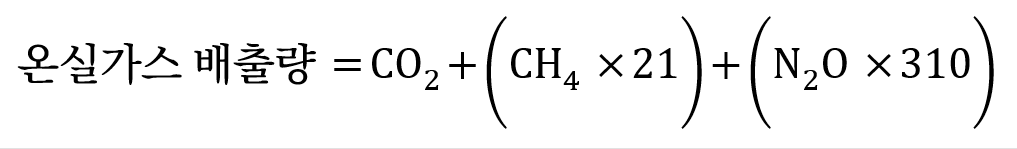

In [132]:
Image('/Users/kimtaeyong/Desktop/final/images/GHGFomula.png')

### 2.2.3 에너지 소비 및 온실가스 배출 원단위 산정  방법

철도, 선박, 항공의 도로수송을 효율적으로 비교하기 위하여 에너지 소비량과 온실가스 배출량을 수송실적(인km, 톤km)으로 나눠 다음과 같이 에너지소비원단위(kcal/pkm*tkm)와 온실가스매출원단위(gCO2e/pkm*tkm)를 선정하였다. 단, 본 논고에서는 수송실적의 데이터 특성 때문에 인-키로(pkm)를 기준으로 계산하였다.

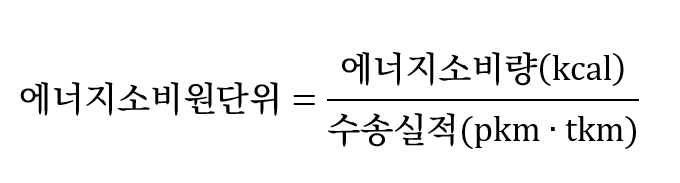

In [136]:
Image('/Users/kimtaeyong/Desktop/final/images/engUnit.png')

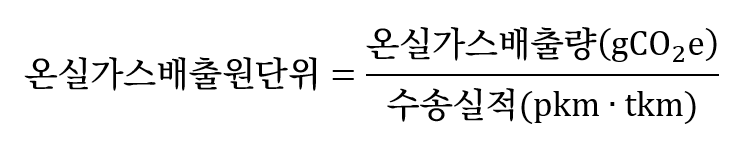

In [135]:
Image('/Users/kimtaeyong/Desktop/final/images/GHGUnit.png')

# 3. 에너지 소비 및 온실가스 배출 원단위 산정 및 분석

앞으로의 Data 표에서 index는 다음과 같은 순으로 배열했다.

0: 'Gasoline', 1: 'Diesel', 2: 'LPG', 3: 'AVGAS', 4: 'Bunker-C-oil', 5: 'etc'

In [10]:
# Import excel data as Dataframe
rail_con = pd.read_excel('/Users/kimtaeyong/Desktop/final/data/Fuel_consumption_by_fuel_railway.xlsx')
ship_con = pd.read_excel('/Users/kimtaeyong/Desktop/final/data/Fuel_consumption_by_fuel_shipment.xlsx')
air_con = pd.read_excel('/Users/kimtaeyong/Desktop/final/data/Fuel_consumption_by_fuel_aircraft.xlsx')
trans_result = pd.read_excel('/Users/kimtaeyong/Desktop/final/data/transport_result.xlsx')
coef = pd.read_excel('/Users/kimtaeyong/Desktop/final/data/coefficients.xlsx')

In [85]:
# 연료별 순발열량 변환계수 산출

print("[순발열량 변환계수]")
net = coef['Net_Calorific_Value']

net

[순발열량 변환계수]


0    0.726
1    0.841
2    1.395
3    0.936
4    1.000
5    0.810
Name: Net_Calorific_Value, dtype: float64

In [74]:
# 연료별 화학식 배출계수
CH4_coef = coef['CH4_Coefficient'].reset_index(drop=True)
CO2_coef = coef['CO2_Coefficient'].reset_index(drop=True)
N2O_coef = coef['N2O_Coefficient'].reset_index(drop=True)

print("[CH4의 배출계수]")
print(CH4_coef)

print("[CO2의 배출계수]")
print(CO2_coef)

print("[N2O의 배출계수]")
print(N2O_coef)

[CH4의 배출계수]
0    3
1    3
2    1
3    3
4    3
5    3
Name: CH4_Coefficient, dtype: int64
[CO2의 배출계수]
0    71.676000
1    73.740333
2    64.672667
3    80.406333
4    76.283167
5    73.080333
Name: CO2_Coefficient, dtype: float64
[N2O의 배출계수]
0    0.6
1    0.6
2    0.1
3    0.6
4    0.6
5    0.6
Name: N2O_Coefficient, dtype: float64


## 3.1 철도수송 부문 에너지 소비량 및 온실가스 배출량

### 3.1.1 철도수송 부문 에너지 소비량 산출

In [75]:
# 철도의 에너지 소비량 = 철도의 연료별 소모량 x 철도의 순발열량 변환계수 

print("[railway 연료별 소모량]")
rail_years = rail_con.iloc[:-1, 10:-2]
rail_years
print(rail_years)

print("[railway 에너지 소비량]")
rail_eng = rail_years.multiply(net, axis=0)
rail_eng
print(rail_eng)

[railway 연료별 소모량]
   1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1   326   335   339   339   347   296   279   255   231   227   200   195   
2     1     0     0     0     0     0     0     0     0     0     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4     1     1     1     1     1     1     1     1     0     0     0     0   
5     1     1     0     0     0     0     0     0     0     1     1     0   

   2011  2012  2013  2014  2015  2016  2017  2018  
0     0     0     0     0     0     0     0     0  
1   177   176   155   130   118   104   101   101  
2     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0     0  
5     0     0     0     0     0     0     0     0  
[railway 에너지 소비량]
      1999     2000     2001     2002     2003     2004     

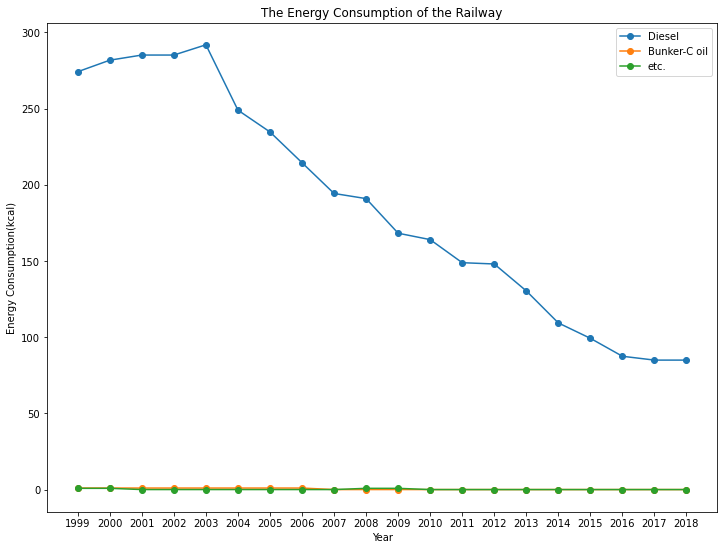

In [166]:
# 연료에 따른 railway 에너지 소비량

year = list(range(1999,2019,1)) # x축 설정

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 각 연료에 해당하는 행을 추출한 후, 연도에 따른 연료별 에너지 소비량 그래프 설정
# plt.plot(year, rail_eng.loc[0], marker='o', label = 'Gasoline')
plt.plot(year, rail_eng.loc[1], marker='o', label = 'Diesel')
# plt.plot(year, rail_eng.loc[2], marker='o', label = 'LPG')
# plt.plot(year, rail_eng.loc[3], marker='o', label = 'AVGAS')
plt.plot(year, rail_eng.loc[4], marker='o', label = 'Bunker-C oil')
plt.plot(year, rail_eng.loc[5], marker='o', label = 'etc.')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Energy Consumption(kcal)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Energy Consumption of the Railway') # 그래프 타이틀 설정

plt.show()

우선, 철도 부문은 경유(Diesel)가 주에너지원으로, 전체의 99% 이상을 차지한다.

1999년 약 277억 kcal의 에너지 소비량을 보였고 2003년까지는 증가하는 추세를 보이다가 2003년 최고치(약 293억 kcal)를 달성한 후 계속해서 감소하는 추세이다. 

2015년부터는 100억 kcal보다 낮은 에너지 소비량을 보였고 가장 최근인 2018년의 에너지 소비량은 약 85억 kcal이다.
평균 에너지 소비량은 약 187억 kcal이다.

### 3.1.2 철도수송 부문 연료별 배출량 산출

In [78]:
# 철도의 연료별 배출량 = 철도의 에너지 소비량 x 연료별 배출계수

# 철도의 연료별 배출량 계산
rail_CH4_emis = rail_eng.multiply(CH4_coef, axis=0)
rail_CO2_emis = rail_eng.multiply(CO2_coef, axis=0)
rail_N2O_emis = rail_eng.multiply(N2O_coef, axis=0)

# 철도의 연료별 배출량
print("[철도의 CH4 배출량]")
print(rail_CH4_emis)
print("[철도의 CO2 배출량]")
print(rail_CO2_emis)
print("[철도의 N2O 배출량]")
print(rail_N2O_emis)

[철도의 CH4 배출량]
      1999     2000     2001     2002     2003     2004     2005     2006  \
0    0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
1  822.498  845.205  855.297  855.297  875.481  746.808  703.917  643.365   
2    1.395    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
3    0.000    0.000    0.000    0.000    0.000    0.000    0.000    0.000   
4    3.000    3.000    3.000    3.000    3.000    3.000    3.000    3.000   
5    2.430    2.430    0.000    0.000    0.000    0.000    0.000    0.000   

      2007     2008    2009     2010     2011     2012     2013    2014  \
0    0.000    0.000    0.00    0.000    0.000    0.000    0.000    0.00   
1  582.813  572.721  504.60  491.985  446.571  444.048  391.065  327.99   
2    0.000    0.000    0.00    0.000    0.000    0.000    0.000    0.00   
3    0.000    0.000    0.00    0.000    0.000    0.000    0.000    0.00   
4    0.000    0.000    0.00    0.000    0.000    0.000    0.000    0.00

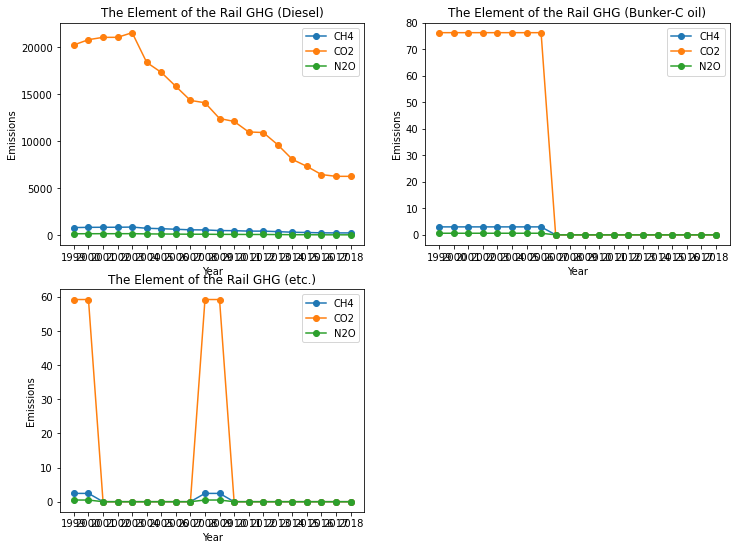

In [142]:
# 철도의 연료별 화학식 (CH4, CO2, N2O) 배출량

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# Diesel에 대한 온실가스 요소 그래프
# Diesel 그래프 위치 설정
plt.subplot(221)

# 연도에 따른 철도의 온실가스 요소
plt.plot(year, rail_CH4_emis.loc[1], marker='o', label = 'CH4')
plt.plot(year, rail_CO2_emis.loc[1], marker='o', label = 'CO2')
plt.plot(year, rail_N2O_emis.loc[1], marker='o', label = 'N2O')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Emissions') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Element of the Rail GHG (Diesel)') # 그래프 타이틀 설정

# Bunker-C oil에 대한 온실가스 요소 그래프
# Bunker-C oil 그래프 위치 설정
plt.subplot(222)

# 연도에 따른 철도의 온실가스 요소
plt.plot(year, rail_CH4_emis.loc[4], marker='o', label = 'CH4')
plt.plot(year, rail_CO2_emis.loc[4], marker='o', label = 'CO2')
plt.plot(year, rail_N2O_emis.loc[4], marker='o', label = 'N2O')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Emissions') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Element of the Rail GHG (Bunker-C oil)') # 그래프 타이틀 설정

# 그 외 연료에 대한 온실가스 요소 그래프
# 기타 연료 그래프 위치 설정
plt.subplot(223)

# 연도에 따른 철도의 온실가스 요소
plt.plot(year, rail_CH4_emis.loc[5], marker='o', label = 'CH4')
plt.plot(year, rail_CO2_emis.loc[5], marker='o', label = 'CO2')
plt.plot(year, rail_N2O_emis.loc[5], marker='o', label = 'N2O')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Emissions') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Element of the Rail GHG (etc.)') # 그래프 타이틀 설정

plt.show()

철도는 경유(Diesel)가 전체 연료 중 99% 이상의 비중을 차지하므로, 경유 그래프를 중점적으로 살펴보면 CO2 소비량이 CH4, N2O 소비량에 비해 크게 많은 것을 알 수 있다. 

그리고 세 배출량은 전체적으로 시간의 흐름에 따라 감소하는 형태를 보인다.

### 3.1.3 철도수송 부문 온실가스 배출량 산출

In [81]:
# 온실가스 배출량 = CO2 + (CH4 x 21) + (N2O x 310)

CH4 = 21
N2O = 310

# 철도의 온실가스 배출량
print("[철도의 온실가스 배출량]")
rail_GHG = rail_CO2_emis + (rail_CH4_emis * CH4) + (rail_N2O_emis * N2O)
rail_GHG_total = rail_GHG.sum()
rail_GHG_total.to_frame()
print(rail_GHG_total)

[철도의 온실가스 배출량]
1999    89233.352835
2000    91513.416048
2001    92338.229460
2002    92338.229460
2003    94509.626422
2004    80666.970785
2005    76052.752240
2006    69538.561352
2007    62699.087297
2008    61874.273886
2009    54545.809137
2010    52927.800965
2011    48042.157799
2012    47770.733179
2013    42070.816152
2014    35285.200643
2015    32028.105199
2016    28228.160515
2017    27413.886654
2018    27413.886654
dtype: float64


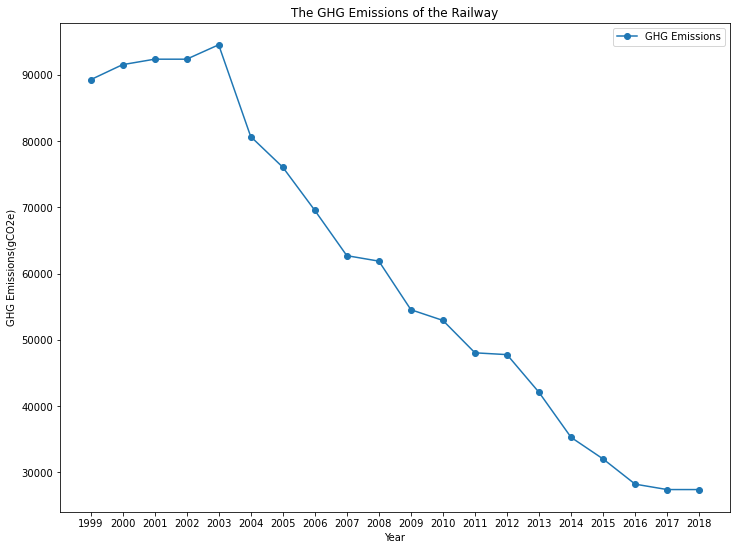

In [111]:
# railway 온실가스 배출량

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 연도에 따른 철도 온실가스 총합 배출량 그래프 설정
plt.plot(year, rail_GHG_total, marker='o', label = 'GHG Emissions')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('GHG Emissions(gCO2e)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The GHG Emissions of the Railway') # 그래프 타이틀 설정

plt.show()

온실가스 배출량도 에너지 소비량과 같은 양상을 보인다. 

1999년 약 893천톤 CO2e로 산정되어 2003년까지 증가 추세를 띄다가 2003년 최고치인 945천톤 CO2e를 달성한 후 계속해서 감소하는 추세이다.

2018년 온실가스 배출량은 약 274천톤 CO2e이다.

평균 온실가스 배출량은 약 603천톤 CO2e이다.

##  3.2 선박수송 부문 에너지 소비량 및 온실가스 배출량

### 3.2.1 선박수송 부문 에너지 소비량 산출

In [77]:
# 선박의 에너지 소비량 = 선박의 연료별 소모량 x 선박의 순발열량 변환계수 

print("[shipment 연료별 소모량]")
ship_years = ship_con.iloc[:-1, 10:-2]
print(ship_years)

print("[shipment 에너지 소비량]")
ship_eng = ship_years.multiply(net, axis=0)
print(ship_eng)

[shipment 연료별 소모량]
   1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
0     1     0     1     0     0     0     0     0     0     0     0     0   
1   471   360   222   288   295   291   255   277   281   263   210   210   
2     2     1     1     1     1     1     1     0     0     2     0     0   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4    93   435   500   562   594   562   554   468   455   494   472   428   
5   140   132   114   123   123   112   121   155   145   133   141   134   

   2011  2012  2013  2014  2015  2016  2017  2018  
0     0     0     0     1     0     7     8     8  
1   199   193   205   150   242   212   220   151  
2     0     1     2     0     2     2     1     1  
3     0     0     0     0     0     0     0     0  
4   425   415   169   105   197   134    99    66  
5   145   123   108    89   120   127   125   120  
[shipment 에너지 소비량]
      1999     2000     2001     2002     2003     2004   

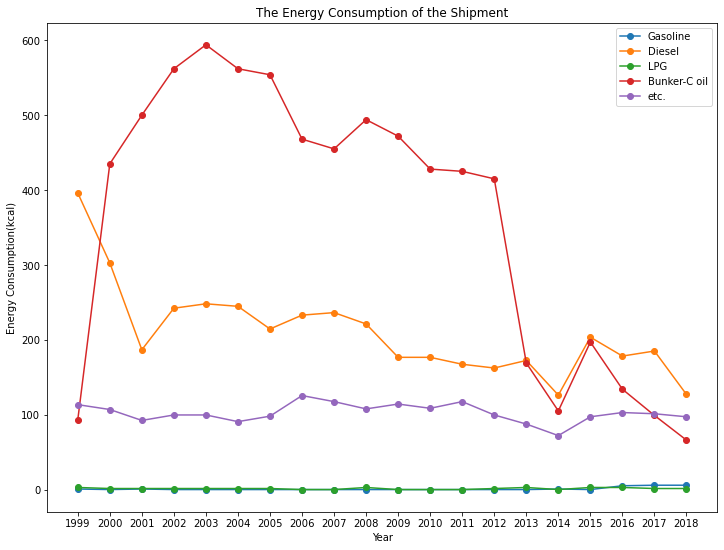

In [112]:
# 연료에 따른 shipment 에너지 소비량

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 각 연료에 해당하는 행을 추출한 후, 연도에 따른 연료별 에너지 소비량 그래프 설정
plt.plot(year, ship_eng.loc[0], marker='o', label = 'Gasoline')
plt.plot(year, ship_eng.loc[1], marker='o', label = 'Diesel')
plt.plot(year, ship_eng.loc[2], marker='o', label = 'LPG')
# plt.plot(year, ship_eng.loc[3], marker='o', label = 'AVGAS')
plt.plot(year, ship_eng.loc[4], marker='o', label = 'Bunker-C oil')
plt.plot(year, ship_eng.loc[5], marker='o', label = 'etc.')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Energy Consumption(kcal)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Energy Consumption of the Shipment') # 그래프 타이틀 설정

plt.show()

선박 부문은 경유(Diesel), B-C유(Bunker C-oil), 휘발유(Gasoline), LPG 등 다양한 연료원을 사용한다. 주에너지원이 경유인 년도와 B-C유인 년도가 각각 존재한다는 것을 특이점으로 볼 수 있다. 

1999년 약 627억 kcal의 에너지 소비량을 보였고 이는 2003년까지 증가하다가 2003년 최고치(약 928억 kcal)를 달성하고 이후 계속해서 감소하는 추세이다.

2018년에는 약 316억 kcal의 에너지 소비량을 보였다.

평균 에너지 소비량은 약 667억 kcal이다.

### 3.2.2 선박수송 부문 연료별 배출량 산출

In [79]:
# 선박의 연료별 배출량 = 선박의 에너지 소비량 x 연료별 배출계수

# 선박의 연료별 배출량 계산
ship_CH4_emis = ship_eng.multiply(CH4_coef, axis=0)
ship_CO2_emis = ship_eng.multiply(CO2_coef, axis=0)
ship_N2O_emis = ship_eng.multiply(N2O_coef, axis=0)

# 선박의 연료별 배출량
print("[선박의 CH4 배출량]")
print(ship_CH4_emis)
print("[선박의 CO2 배출량]")
print(ship_CO2_emis)
print("[선박의 N2O 배출량]")
print(ship_N2O_emis)

[선박의 CH4 배출량]
       1999      2000      2001      2002      2003      2004      2005  \
0     2.178     0.000     2.178     0.000     0.000     0.000     0.000   
1  1188.333   908.280   560.106   726.624   744.285   734.193   643.365   
2     2.790     1.395     1.395     1.395     1.395     1.395     1.395   
3     0.000     0.000     0.000     0.000     0.000     0.000     0.000   
4   279.000  1305.000  1500.000  1686.000  1782.000  1686.000  1662.000   
5   340.200   320.760   277.020   298.890   298.890   272.160   294.030   

       2006      2007      2008     2009     2010      2011      2012  \
0     0.000     0.000     0.000     0.00     0.00     0.000     0.000   
1   698.871   708.963   663.549   529.83   529.83   502.077   486.939   
2     0.000     0.000     2.790     0.00     0.00     0.000     1.395   
3     0.000     0.000     0.000     0.00     0.00     0.000     0.000   
4  1404.000  1365.000  1482.000  1416.00  1284.00  1275.000  1245.000   
5   376.650   352.350 

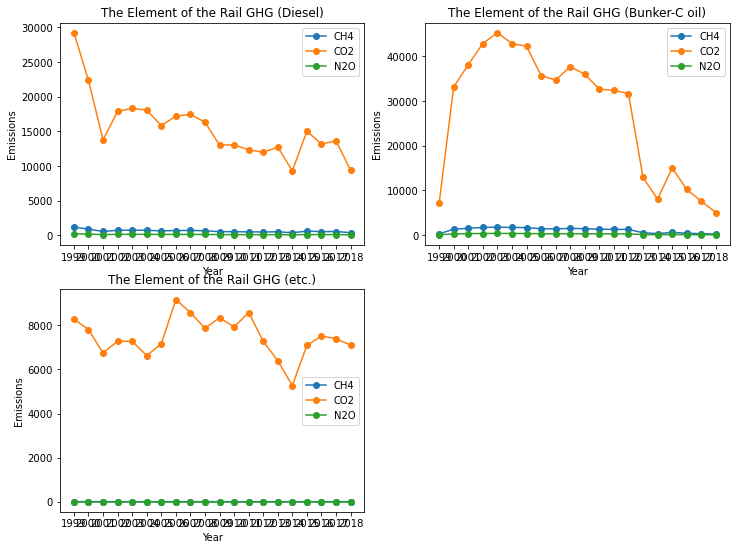

In [167]:
# 선박의 연료별 화학식 (CH4, CO2, N2O) 배출량

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# Diesel에 대한 온실가스 요소 그래프
# Diesel 그래프 위치 설정
plt.subplot(221)

# 연도에 따른 선박의 온실가스 요소
plt.plot(year, ship_CH4_emis.loc[1], marker='o', label = 'CH4')
plt.plot(year, ship_CO2_emis.loc[1], marker='o', label = 'CO2')
plt.plot(year, ship_N2O_emis.loc[1], marker='o', label = 'N2O')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Emissions') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Element of the Rail GHG (Diesel)') # 그래프 타이틀 설정

# Bunker-C oil에 대한 온실가스 요소 그래프
# Bunker-C oil 그래프 위치 설정
plt.subplot(222)

# 연도에 따른 선박의 온실가스 요소
plt.plot(year, ship_CH4_emis.loc[4], marker='o', label = 'CH4')
plt.plot(year, ship_CO2_emis.loc[4], marker='o', label = 'CO2')
plt.plot(year, ship_N2O_emis.loc[4], marker='o', label = 'N2O')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Emissions') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Element of the Rail GHG (Bunker-C oil)') # 그래프 타이틀 설정

# 그 외 연료에 대한 온실가스 요소 그래프
# 기타 연료 그래프 위치 설정
plt.subplot(223)

# 연도에 따른 철도의 온실가스 요소
plt.plot(year, rail_CH4_emis.loc[5], marker='o', label = 'CH4')
plt.plot(year, ship_CO2_emis.loc[5], marker='o', label = 'CO2')
plt.plot(year, air_N2O_emis.loc[5], marker='o', label = 'N2O')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Emissions') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Element of the Rail GHG (etc.)') # 그래프 타이틀 설정

plt.show()

선박의 연료별 배출량을 살펴보면 경유(Diesel)는 점점 온실가스 배출량이 감소하는 것을, B-C유(Bunker C-oil)는 시간의 흐름에 따라 배출량이 증가했다가 감소하는 것을 알 수 있다.

### 3.2.3 선박수송 부문 온실가스 배출량 산출

In [107]:
# 선박의 온실가스 배출량
print("[선박의 온실가스 배출량]")
ship_GHG = ship_CO2_emis + (ship_CH4_emis * CH4) + (ship_N2O_emis * N2O)
ship_GHG_total = ship_GHG.sum()
ship_GHG_total.to_frame()
print(ship_GHG_total)

[선박의 온실가스 배출량]
1999    195174.567993
2000    273810.628430
2001    253034.316173
2002    293231.052303
2003    305540.085978
2004    291175.590394
2005    281150.004358
2006    267854.327682
2007    262102.494297
2008    267097.790531
2009    247317.619807
2010    231178.964983
2011    230087.180430
2012    219629.087871
2013    139116.006635
2014     98320.007556
2015    161397.267094
2016    136217.559906
2017    126552.328301
2018     95785.259648
dtype: float64


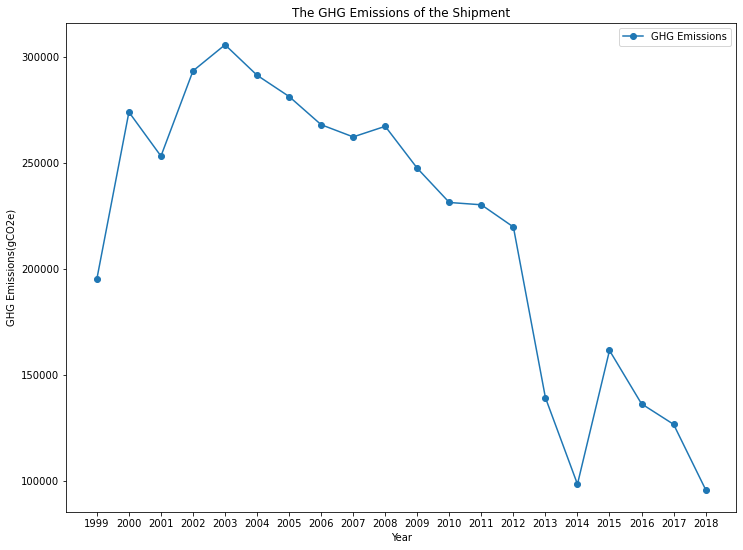

In [113]:
# shipment 온실가스 배출량

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 연도에 따른 선박 온실가스 총합 배출량 그래프 설정
plt.plot(year, ship_GHG_total, marker='o', label = 'GHG Emissions')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('GHG Emissions(gCO2e)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The GHG Emissions of the Shipment') # 그래프 타이틀 설정

plt.show()

전체적으로 에너지 소비량과 비슷한 양상을 띤다.

1999년 약 2,026천톤 CO2e의 온실가스 배출량을 보였고 2003년까지 증가 추세를 보이다가 2003년 최고치(약 3,034천톤 CO2e)를 달성한 후 지속적으로 감소 추세를 보였다.

2014년, 최저치인 약 1,023천톤 CO2e를 달성하였고 가장 최근 수치인 2018년 온실가스 배출량은 약 1,024천톤 CO2e이다.

평균 온실가스 배출량은 약 2,208천톤 CO2e이다.

## 3.3 항공수송 부문 에너지 소비량 및 온실가스 배출량

### 3.3.1 항공수송 부문 에너지 소비량 산출

In [31]:
# 항공의 에너지 소비량 = 항공의 연료별 소모량 x 항공의 순발열량 변환계수 

print("[aircraft 연료별 소모량]")
air_years = air_con.iloc[:-1, 10:-2]
print(air_years)

print("[aircraft 에너지 소비량]")
air_eng = air_years.multiply(net, axis=0)
print(air_eng)

[aircraft 연료별 소모량]
   1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  2010  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   
2     0     0     0     0     0     0     0     0     0     0     0     0   
3   478   518   478   493   506   419   380   356   351   365   402   422   
4     0     0     0     0     0     0     0     0     0     0     0     0   
5     0     0     0     0     0     0     0     0     0     0     0     0   

   2011  2012  2013  2014  2015  2016  2017  2018  
0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0  
3   446   449   485   525   541   616   615   596  
4     0     0     0     0     0     0     0     0  
5     0     0     0     0     0     0     0     0  
[aircraft 에너지 소비량]
      1999     2000     2001     2002     2003     2004   

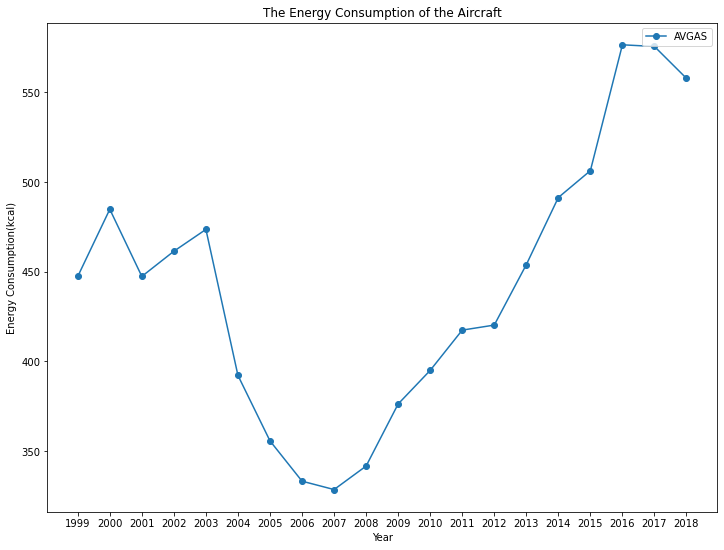

In [164]:
# 연료에 따른 aircraft 에너지 소비량

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 각 연료에 해당하는 행을 추출한 후, 연도에 따른 연료별 에너지 소비량 그래프 설정
# plt.plot(year, air_eng.loc[0], marker='o', label = 'Gasoline')
# plt.plot(year, air_eng.loc[1], marker='o', label = 'Diesel')
# plt.plot(year, air_eng.loc[2], marker='o', label = 'LPG')
plt.plot(year, air_eng.loc[3], marker='o', label = 'AVGAS')
# plt.plot(year, air_eng.loc[4], marker='o', label = 'Bunker-C oil')
# plt.plot(year, air_eng.loc[5], marker='o', label = 'etc.')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Energy Consumption(kcal)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Energy Consumption of the Aircraft') # 그래프 타이틀 설정

plt.show()

항공 부문은 항공유(AVGAS)가 주에너지원이자 유일한 에너지원이다. 

1999년 약 387억 kcal의 에너지 소비량을 보였고 이는 2007년까지 감소하다가 2007년 최저치(약 284억 kcal)를 달성하고 이후 급격하게 증가하는 추세이다. 

최고치인 2016년에는 약 500억 kcal의 에너지 소비량을 보였으며, 2018년에는 그보다는 낮은 수치인 483억 kcal의 에너지 소비량을 보였다.

평균 에너지 소비량은 약 382억 kcal이다.

### 3.3.2 항공수송 부문 연료별 배출량 산출

In [80]:
# 항공의 연료별 배출량 = 항공의 에너지 소비량 x 연료별 배출계수

# 항공의 연료별 배출량 계산
air_CH4_emis = air_eng.multiply(CH4_coef, axis=0)
air_CO2_emis = air_eng.multiply(CO2_coef, axis=0)
air_N2O_emis = air_eng.multiply(N2O_coef, axis=0)

# 항공의 연료별 배출량
print("[항공의 CH4 배출량]")
print(air_CH4_emis)
print("[항공의 CO2 배출량]")
print(air_CO2_emis)
print("[항공의 N2O 배출량]")
print(air_N2O_emis)

[항공의 CH4 배출량]
       1999      2000      2001      2002      2003      2004     2005  \
0     0.000     0.000     0.000     0.000     0.000     0.000     0.00   
1     0.000     0.000     0.000     0.000     0.000     0.000     0.00   
2     0.000     0.000     0.000     0.000     0.000     0.000     0.00   
3  1342.224  1454.544  1342.224  1384.344  1420.848  1176.552  1067.04   
4     0.000     0.000     0.000     0.000     0.000     0.000     0.00   
5     0.000     0.000     0.000     0.000     0.000     0.000     0.00   

      2006     2007     2008      2009      2010      2011      2012     2013  \
0    0.000    0.000     0.00     0.000     0.000     0.000     0.000     0.00   
1    0.000    0.000     0.00     0.000     0.000     0.000     0.000     0.00   
2    0.000    0.000     0.00     0.000     0.000     0.000     0.000     0.00   
3  999.648  985.608  1024.92  1128.816  1184.976  1252.368  1260.792  1361.88   
4    0.000    0.000     0.00     0.000     0.000     0.000    

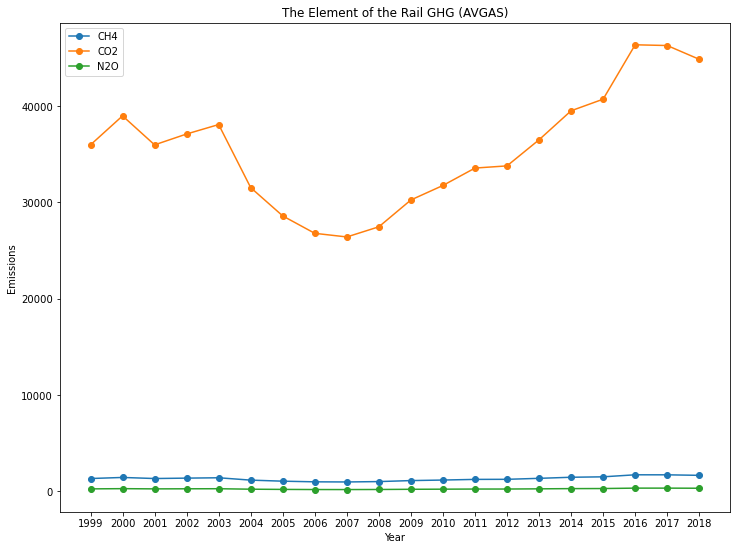

In [143]:
# 항공의 연료별 화학식 (CH4, CO2, N2O) 배출량

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# AVGAS에 대한 온실가스 요소 그래프
# 연도에 따른 선박의 온실가스 요소
plt.plot(year, air_CH4_emis.loc[3], marker='o', label = 'CH4')
plt.plot(year, air_CO2_emis.loc[3], marker='o', label = 'CO2')
plt.plot(year, air_N2O_emis.loc[3], marker='o', label = 'N2O')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Emissions') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Element of the Rail GHG (AVGAS)') # 그래프 타이틀 설정

plt.show()

항공부문에 유일하게 사용되는 항공유는 CO2, CH4, N2O 각각의 소비량이 시간의 흐름에 따라 감소했다가 다시 증가하는 것을 볼 수 있다. 

이는 곧 온실가스 배출량도 감소했다가 증가하는 추세라는 것을 암시한다.

### 3.3.3 항공수송 부문 온실가스 배출량 산출

In [84]:
# 항공의 온실가스 배출량
print("[항공의 온실가스 배출량]")
air_GHG = air_CO2_emis + (air_CH4_emis * CH4) + (air_N2O_emis * N2O)
air_GHG_total = air_GHG.sum()
air_GHG_total.to_frame()
print(air_GHG_total)

[항공의 온실가스 배출량]
1999    147379.028784
2000    159712.001904
2001    147379.028784
2002    152003.893704
2003    156012.109968
2004    129187.893432
2005    117163.244640
2006    109763.460768
2007    108221.839128
2008    112538.379720
2009    123946.379856
2010    130112.866416
2011    137512.650288
2012    138437.623272
2013    149537.299080
2014    161870.272200
2015    166803.461448
2016    189927.786048
2017    189619.461720
2018    183761.299488
dtype: float64


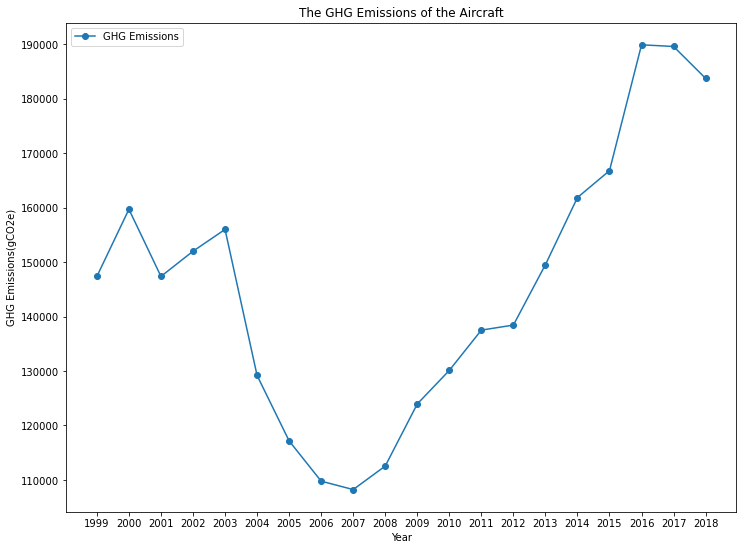

In [115]:
# aircraft 온실가스 배출량

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 연도에 따른 항공 온실가스 총합 배출량 그래프 설정
plt.plot(year, air_GHG_total, marker='o', label = 'GHG Emissions')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('GHG Emissions(gCO2e)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정 
plt.title('The GHG Emissions of the Aircraft') # 그래프 타이틀 설정

plt.show()

전체적으로 에너지 소비량과 비슷한 양상을 띤다.

1999년 약 1,247천톤 CO2e의 온실가스 배출량을 보였고 이는 2007년 최저치(약 916천톤 CO2e)를 달성할 때까지 감소 추세를 보인다.

그러나 2007년 이후 급격하게 증가하는 추세를 보이며 2016년 최고치(약 1,607천톤 CO2e) 달성, 2018년에는 약 1,555천톤 CO2e를 배출하였다.

평균 온실가스 배출량은 약 1,232천톤 CO2e이다.

철도, 선박, 항공 전체를 비교해보면 2012년까지는 선박부문 온실가스 배출량이 가장 높았지만 2013년, 꾸준히 증가해오던 항공부문이 이를 역전한 것을 볼 수 있다. 

2013년 이후 항공부문 온실가스 배출량은 갈수록 증가하고, 철도와 선박부문 온실가스 배출량은 감소하는 추세이다.

## 3.4 수송부문별 에너지 소비량 및 온실가스 배출량 원단위

## 3.4.1 수송실적

In [95]:
# 수송실적 전처리 (단위: 인-키로)
trans = trans_result.iloc[7:12, 2:]

rail_trans = trans.loc[7] # 철도의 연도별 수송실적
ship_trans = trans.loc[8] # 선박의 연도별 수송실적
air_trans = trans.loc[10] # 항공의 연도별 수송실적

## 3.4.2 수송부문별 에너지 소비량 원단위

In [96]:
# 수송부문별 에너지 소비량 원단위 = 수송부문별 에너지 소비량 / 수송부문별 수송실적

rail_eng_unit = rail_eng.div(rail_trans, axis=1)
ship_eng_unit = ship_eng.div(ship_trans, axis=1)
air_eng_unit = air_eng.div(air_trans, axis=1)

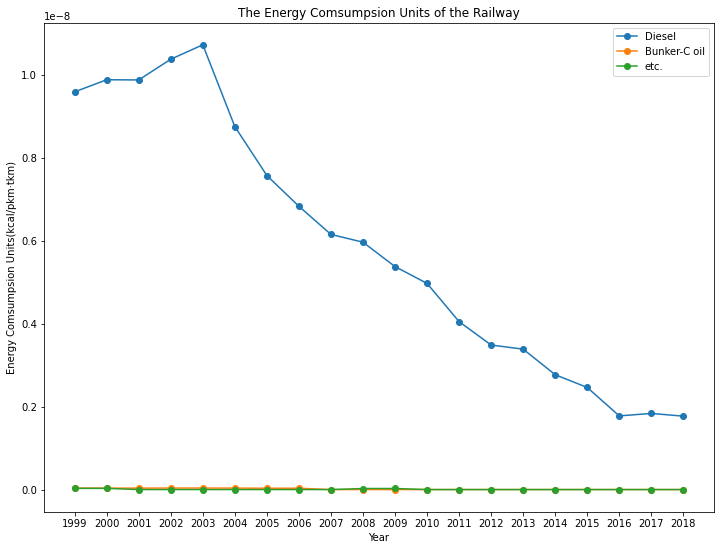

In [163]:
# railway 에너지소비량원단위

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 각 연료에 해당하는 행을 추출한 후, 연도에 따른 연료별 에너지소비량원단위 그래프 설정
# plt.plot(year, rail_eng_unit.loc[0], marker='o', label = 'Gasoline')
plt.plot(year, rail_eng_unit.loc[1], marker='o', label = 'Diesel')
# plt.plot(year, rail_eng_unit.loc[2], marker='o', label = 'LPG')
# plt.plot(year, rail_eng_unit.loc[3], marker='o', label = 'AVGAS')
plt.plot(year, rail_eng_unit.loc[4], marker='o', label = 'Bunker-C oil')
plt.plot(year, rail_eng_unit.loc[5], marker='o', label = 'etc.')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Energy Comsumpsion Units(kcal/pkm·tkm)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Energy Comsumpsion Units of the Railway') # 그래프 타이틀 설정

plt.show()

앞서 설명하였던 것과 같이 2003년까지는 증가하는 추세를 보이다가(2003년 기준 3.47e-6gCO2e/pkm*tkm) 이후 원단위 역시 꾸준히 감소하는 것을 볼 수 있다.

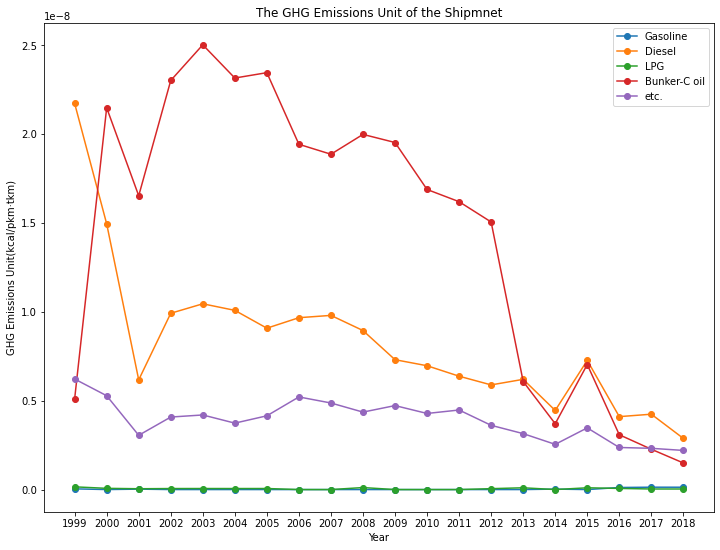

In [168]:
# shipmnet 에너지소비량원단위

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 각 연료에 해당하는 행을 추출한 후, 연도에 따른 연료별 에너지소비량원단위 그래프 설정
plt.plot(year, ship_eng_unit.loc[0], marker='o', label = 'Gasoline') 
plt.plot(year, ship_eng_unit.loc[1], marker='o', label = 'Diesel')
plt.plot(year, ship_eng_unit.loc[2], marker='o', label = 'LPG')
# plt.plot(year, ship_eng_unit.loc[3], marker='o', label = 'AVGAS')
plt.plot(year, ship_eng_unit.loc[4], marker='o', label = 'Bunker-C oil')
plt.plot(year, ship_eng_unit.loc[5], marker='o', label = 'etc.')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('GHG Emissions Unit(kcal/pkm·tkm)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The GHG Emissions Unit of the Shipmnet') # 그래프 타이틀 설정

plt.show()

선박부문 역시 철도와 마찬가지로 꾸준한 감소 추세를 보인다. 
2000년 최고치(13.8e-6gCO2e/pkm*tkm) 이후 꾸준히 감소한다.

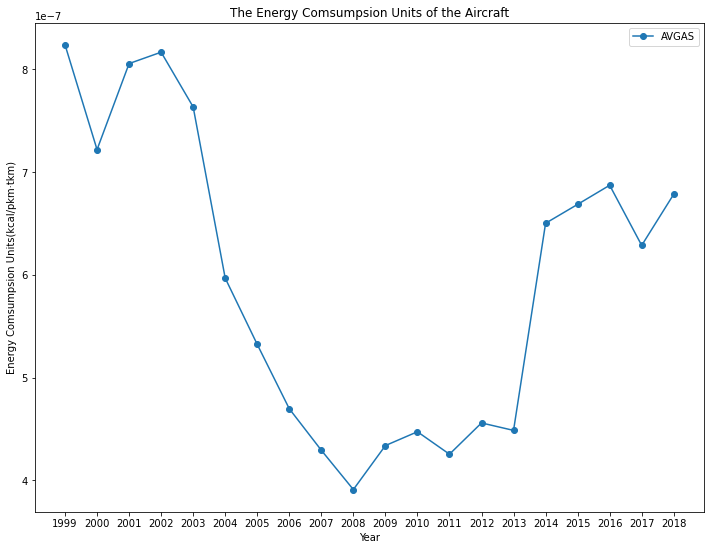

In [161]:
# aircraft 에너지소비량원단위

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 각 연료에 해당하는 행을 추출한 후, 연도에 따른 연료별 에너지소비량원단위 그래프 설정
# plt.plot(year, air_eng_unit.loc[0], marker='o', label = 'Gasoline')
# plt.plot(year, air_eng_unit.loc[1], marker='o', label = 'Diesel')
# plt.plot(year, air_eng_unit.loc[2], marker='o', label = 'LPG')
plt.plot(year, air_eng_unit.loc[3], marker='o', label = 'AVGAS')
# plt.plot(year, air_eng_unit.loc[4], marker='o', label = 'Bunker-C oil')
# plt.plot(year, air_eng_unit.loc[5], marker='o', label = 'etc.')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Energy Comsumpsion Units(kcal/pkm·tkm)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Energy Comsumpsion Units of the Aircraft') # 그래프 타이틀 설정

plt.show()

항공부문의 온실가스 배출 원단위는 2008년 최저치(138e-6gCO2e/pkm*tkm)를 기록하였지만, 이후 다시 증가하고 있는 추세이다. 

가장 최근인 2018년에 산정된 온실가스 배출 원단위는 219e-6gCO2e/pkm*tkm이다.

철도, 선박, 항공부문의 온실가스 배출 원단위를 비교하면 다음과 같다. 한 눈에 봐도 항공부문의 온실가스 배출 원단위가 압도적으로 큰 것을 알 수 있다. 

즉, 이는 항공부문이 단위수송량당 온실가스 배출에서 가장 심각한 상황이라는 것을 뜻하며 그 뒤를 선박부문, 철도부문 순서로 잇는다. 

세 수송수단 중 단위수송량당 온실가스 배출에서 가장 우위를 점하는 수단은 철도 부문인 것을 알 수 있다.

## 3.4.3 수송부문별 온실가스 배출량 원단위

In [97]:
# 수송부문별 온실가스 배출량 원단위 = 수송부문별 온실가스 배출량 / 수송부문별 수송실적

rail_GHG_unit = rail_GHG_total.div(rail_trans, axis=0)
ship_GHG_unit = ship_GHG_total.div(ship_trans, axis=0)
air_GHG_unit = air_GHG_total.div(air_trans, axis=0)

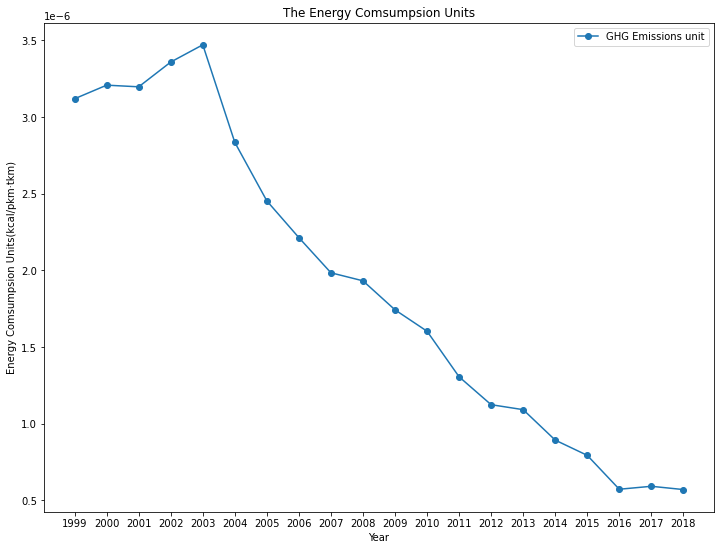

In [160]:
# railway 온실가스 배출량 원단위

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 연도에 따른 철도 온실가스 배출량 원단위 그래프 설정
plt.plot(year, rail_GHG_unit, marker='o', label = 'GHG Emissions unit')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Energy Comsumpsion Units(kcal/pkm·tkm)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Energy Comsumpsion Units') # 그래프 타이틀 설정

plt.show()

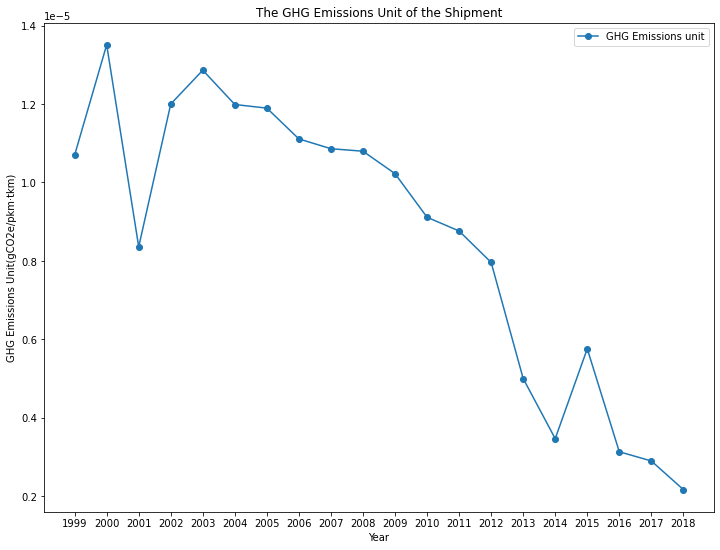

In [162]:
# shipment 온실가스 배출량 원단위

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 연도에 따른 선박 온실가스 배출량 원단위 그래프 설정
plt.plot(year, ship_GHG_unit, marker='o', label = 'GHG Emissions unit')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('GHG Emissions Unit(gCO2e/pkm·tkm)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The GHG Emissions Unit of the Shipment') # 그래프 타이틀 설정

plt.show()

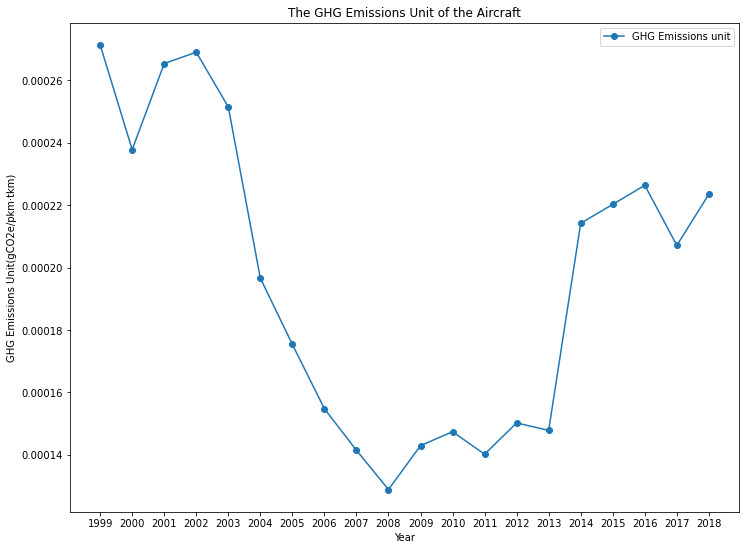

In [122]:
# aircraft 온실가스 배출량 원단위

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 연도에 따른 항공 온실가스 배출량 원단위 그래프 설정
plt.plot(year, air_GHG_unit, marker='o', label = 'GHG Emissions unit')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('GHG Emissions Unit(gCO2e/pkm·tkm)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The GHG Emissions Unit of the Aircraft') # 그래프 타이틀 설정

plt.show()

# 4. 결론 및 정책 제언

## 4.1 결론

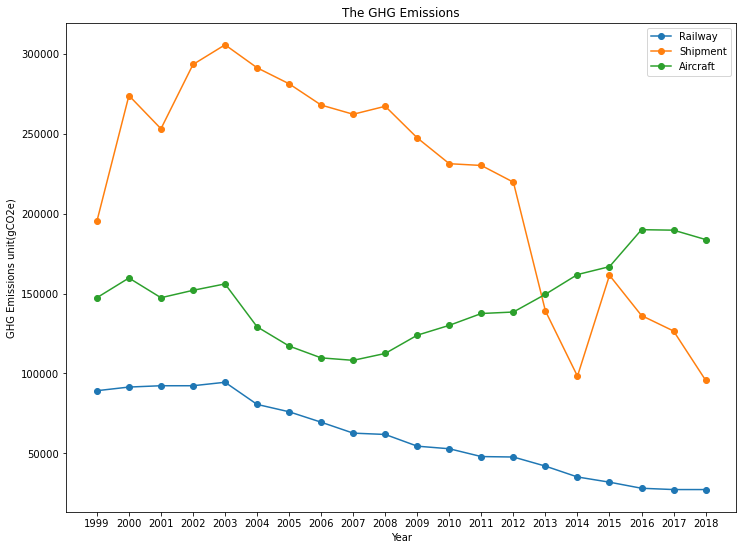

In [145]:
# 전체 온실가스 배출량

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 연도에 따른 철도, 선박, 항공 부문 온실가스 배출량이 한 번에 나오도록 그래프 설정
plt.plot(year, rail_GHG_total, marker='o', label = 'Railway') 
plt.plot(year, ship_GHG_total, marker='o', label = 'Shipment')
plt.plot(year, air_GHG_total, marker='o', label = 'Aircraft')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('GHG Emissions unit(gCO2e)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The GHG Emissions') # 그래프 타이틀 설정

plt.show()

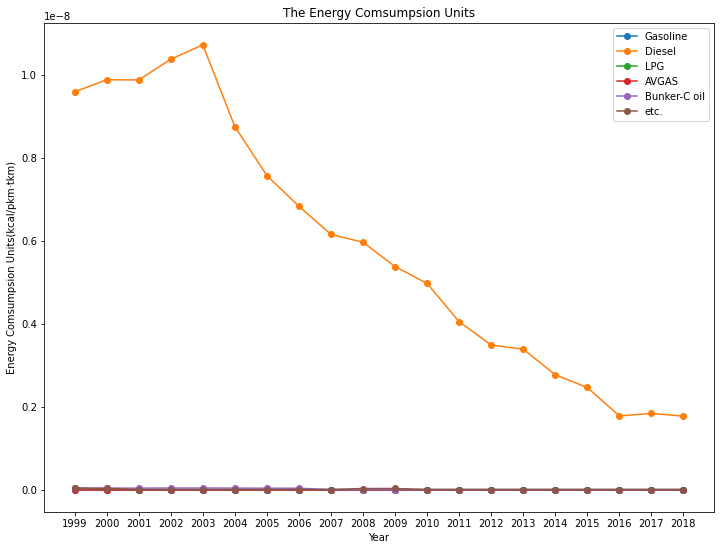

In [159]:
# 전체 에너지 소비량 원단위

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 각 연료에 해당하는 행을 추출한 후, 연도에 따른 연료별 에너지소비량원단위 그래프 설정
plt.plot(year, rail_eng_unit.loc[0], marker='o', label = 'Gasoline')
plt.plot(year, rail_eng_unit.loc[1], marker='o', label = 'Diesel')
plt.plot(year, rail_eng_unit.loc[2], marker='o', label = 'LPG')
plt.plot(year, rail_eng_unit.loc[3], marker='o', label = 'AVGAS')
plt.plot(year, rail_eng_unit.loc[4], marker='o', label = 'Bunker-C oil')
plt.plot(year, rail_eng_unit.loc[5], marker='o', label = 'etc.')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('Energy Comsumpsion Units(kcal/pkm·tkm)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The Energy Comsumpsion Units') # 그래프 타이틀 설정

plt.show()

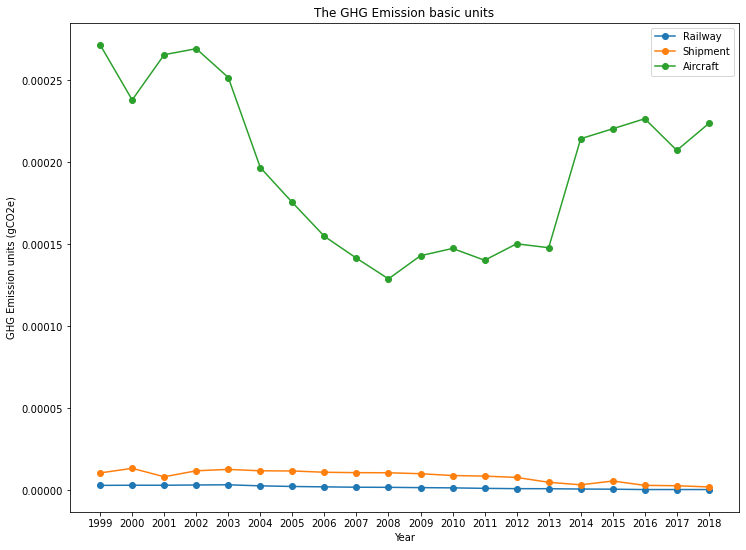

In [156]:
# 전체 온실가스 배출량 원단위

# 그래프 크기 설정
plt.figure(figsize=(12,9))

# 연도에 따른 철도, 선박, 항공 부문 온실가스 배출량 원단위가 한 번에 나오도록 그래프 설정
plt.plot(year, rail_GHG_unit, marker='o', label = 'Railway') 
plt.plot(year, ship_GHG_unit, marker='o', label = 'Shipment')
plt.plot(year, air_GHG_unit, marker='o', label = 'Aircraft')

plt.legend() # 범례 출력
plt.xlabel('Year') # 그래프 x축 이름 설정
plt.ylabel('GHG Emission units (gCO2e)') # 그래프 y축 이름 설정
plt.xticks(list(range(1999,2019,1))) # 그래프 x축 간격 설정
plt.title('The GHG Emission basic units') # 그래프 타이틀 설정

plt.show()

본 연구에서는 국내 수송수단별 에너지 소비량과 수송실적 데이터를 활용하여 철도, 선박, 항공부문의 에너지 소비 및 온실가스 배출 현황 그리고 각각의 원단위를 산정하고 이를 비교해 보았다.

에너지 소비 및 온실가스 배출 원단위를 보면 확인할 수 있듯, 항공부문의 에너지 소비 및 온실가스 배출 원단위가 상대적으로 다른 수송수단에 비해 높은 것을 확인할 수 있었다. 따라서, 이에 대한 앞으로의 노력이 필요하다고 할 수 있다.

또한, 다른 부문은 온실가스 배출 원단위가 근래에 오면서 감소하고 있는 반면, 항공부문의 에너지 소비량과 온실가스 배출량은 2000년대 중후반을 기점으로 다시 증가해오고 있으며 향후 환경 보존적인 측면, 그리고 앞으로 더욱 심각해질 기후변화에 대처하기 위해서는 친환경적인 연료의 사용과 정부 차원에서의 정책 시행이 동시에 필요하다.

해당 연구는 Tier 1 수준에서의 분석으로, 더욱 상세한 연구(Tier 2, Tier 3 방식) 역시 시행될 필요가 있다.

그리고 이를 위해서는 대한민국의 자세한 온실가스 통계 Data Base 구축이 선행되어야 할 것이다.

## 4.2 정책 제언

### 4.2.1 항공 수하물을 철도 수하물로 대체

 유럽환경청에서 분석한 2014년 자료에 따르면, 150인승 기차 승객 1명이 배출하는 이산화탄소는 1km 당 14g이다. 반면 88명이 탄 비행기 승객 1명이  배출하는 이산화탄소는 1km 당 285g이다. 항공기는 고도를 높일수록 탄소 배출량이 많아진다. 또 실은 수하물의 무게가 커질수록 더 많은 이산화탄소를 배출한다. 그 중 ‘항공기의 무게가 커질수록 더 많은 탄소를 배출한다.’라는 사실에 초점을 두었다. 항공사들은 첨단 소재 항공기 제작, 엔진 세척, 경제항로 운영, 항공기 역추력장치의 사용을 줄이는 등 다양한 수단을 통해 온실가스 감축에 힘쓰고 있다. 우리는 항공 업종계의 새로운 탄소 감소 정책 아이디어로 ‘수하물을 다른 교통수단을 통해 운송함으로써, 항공기의 무게를 줄여 탄소 배출을 감소시키자’를 고안했다. 이 아이디어의 적합성을 따지기 위해 선행 연구 자료를 분석하는 것부터 시작하였다. 
 
 이동 거리는 또 하나의 다른 변수가 되기에, 국내 비행으로 한정지어 데이터를 수집하였다. 항공기의 수하물을 운송할 다른 교통 수단으로 무엇이 적합한 지를 찾아야 했다. 선행 논문에서 철도와 도로의 온실가스 배출량 우위성을 비교해보았을 때 철도의 우위성이 높다는 결과가 나왔다. 따라서 도로를 제외하고 ‘철도, 선박, 항공 수송부문의 에너지 소비 및 온실가스 배출의 원단위를 분석’하여 우위성을 비교하였다. 결과적으로 철도의 우위성이 가장 높게 나왔기에, 항공 수하물을 철도 수하물로 대체하는 방안을 제언한다.

### 4.2.2 친환경에너지/신재생에너지/전기에너지 사용 장려

한국철도학회에서 발표된 연구결과에 따르면, 전력을 주로 사용하며 수송량이 많은 고속철도와 수도권전철은 원단위가 낮고, 디젤과 전력을 동시에 사용하며 수송량이 낮은 일반철도와 화물열차는 원단위가 매우 높다는 것이다. 즉, 다시 말하면 디젤과 전력을 동시에 사용하는 경우에는 에너지 소비량 원단위와 온실가스 배출량 원단위가 높아 연료 사용 효율이 좋지 않음과 동시에 온실가스 배출량 또한 매우 높다는 것을 의미한다. 그렇기 때문에 화석연료를 사용할 경우, 오히려 전기에너지를 사용할 때보다 효율이 떨어지고 온실가스와 같은 오염물질을 더 많이 배출하기 때문에, 화학에너지의 사용을 감소시켜야 한다.

화학연료의 대체제로는 친환경에너지, 신재생에너지, 그리고 전기에너지가 존재하는데, 철도와 같은 경우에는 이미 전기에너지로 많이 대체가 되어가고 있는 상황이다. 그렇기에 이와 같이 대부분 교통수단 연료가 전기에너지로 바뀌게 된다면, 앞으로 높은 수송실적으로 적은 온실가스를 배출할 수 있을 것이다. 그러나 그 외의 운송업에서는 대부분 화석연료를 기반으로 운송을 하기 때문에 문제가 된다. 만일 다른 운송업에서도 화석연료의 사용을 점차 줄여서 사용한다면 철도의 경우와 마찬가지로 적은 온실가스로 더 나은 수송실적을 이뤄낼 수 있을 것이다. 그러므로 앞으로 운송업에 대하여 화석연료보다는 친환경에너지, 신재생에너지, 전기에너지와 같은 친환경적 에너지 사용을 장려해야한다. 

### 4.2.3 에너지 및 온실가스 관련 DataBase 구축

본 연구를 통해서 차종별 연료에 따른 에너지 소비량, 에너지 소비량 원단위, 온실가스 배출량, 온실가스 배출량 원단위를 각종 데이터를 통해 도출하였다. 그 결과, 각 연료별로 얼마나 많은 에너지가 사용이 되는지, 그리고 각 연료가 배출하는 온실가스의 양은 얼만큼이며 그 온실가스 내에는 주로 어떤 성분이 포함되는지에 대해 파악할 수 있었다.

이처럼 운송업의 에너지 및 온실가스 관련 데이터베이스를 구축한다면, 연료별 에너지 소비량과 온실가스 배출량에 대한 상관관계를 빠르게 파악할 것이다. 이들의 상관관계를 통해서 특정 연료가 온실가스 배출이 상대적으로 적은지 많은지 파악이 가능하게 될 것이며, 그로 인해 연료를 좀 더 효율적으로 사용하게 되어 실질적으로 온실가스 배출량을 감소시킬 것이다. 그렇기에 이러한 이유로 우리는 앞으로 각 운송업에 대한 에너지 및 온실가스 관련 데이터베이스를 구축하여 온실가스 배출량 절감을 위한 효율적인 움직임을 보여야한다.

# 5. 참고 문헌

## 논문

- 김병관, 이진선, 김현구, 이재영, 철도와 도로 수송부문의 에너지 소비 및 온실가스 배출 원단위 분석, 2014, 한국철도학회, 한국철도학회논문집 제17권 제3호, pp. 216-222

- 김민정, 안미진, 항공교통 부문 온실가스 배출규모 추정 및 관리 방안, 2008, 한국교통연구원, 연구총서
- 한국항공대학교 산학협력단, 항공분야 온실가스 감축을 위한 교육시스템 구축방안 연구, 2015, 국토교통부, 한국항공대학교
- 기후변화에 관한 정부간 협의체(IPCC) 제5차 평가 종합보고서, 2014, IPCC


## 웹사이트

- ESG 경제, 2021.08.30. 접속, http://www.esgeconomy.com/news/articleView.html?idxno=405
- 서울특별시, 2021.08.27. 접속, https://news.seoul.go.kr/env/environment/green-house-inventory#list/1

본 저장물의 저작권은 Apache License v2.0을 따릅니다.